* FIS02013 - Tópicos de Astronomia Galáctica, Extragaláctica e Cosmologia
* Trabalho 1 - Determinação do Centro Galáctico
* Wallace da Silva Carvalho - Cartão UFRGS: 156018

In [ ]:
import math
import matplotlib.pyplot as plt
import astropy.units as u
from scipy import stats
from astropy.coordinates import SkyCoord

* Preenchendo os valores faltantes no arquivo, a partir das expressões: 

\begin{align}
  RGC = (R_{0}^{2}+R_{S}^{2} - 2R_{0}R_{S}\cos l\cos b)^{1/2}
\end{align}

\begin{align}
X = R_{S}\cos b\cos l
\end{align}

\begin{align}
Y = R_{S}\cos b\sin l
\end{align}

\begin{align}
Z = R_{S}\sin b
\end{align}

* Para identificar RGC. seria necessário antes determinar $R_{0}$, a distância do sol ao centro galáctico. Como isso só vai ser feito no final, apenas para fins de preencher os valores faltantes no arquivo, vou usar o valor atualmente aceito $R_{0} = 8$ kpc.

In [ ]:
infile = "/content/AglomeradosSeparados.dat"

file1 = open(infile, "r")

ls_obj=[]

next(file1)             #Pula a primeira linha do arquivo (cabeçalho)
                        #P.S. Modifiquei o arquivo original, o cabeçalho 
                        #só tem uma linha
for linha in file1:
  #.strip() tira os espaços em branco, .rstrip("\n") o caractere de newline do
  #final da linha, split("&") separa os valores da linha pelo demarcador "&"
  IDName, RA, DEC, L, B, R_S, R_gc, X, Y, Z = linha.rstrip("\n").split("&")
  d = {"IDName": IDName.strip(), "RA": RA.strip(), "DEC": DEC.strip(),
      "L": L.strip(), "B": B.strip(), "R_S": R_S.strip(), 
       "R_gc": R_gc.strip(), "X": X.strip(), 
       "Y": Y.strip(), "Z" : Z.strip()}
  ls_obj.append(d)

file1.close()

for el in ls_obj:
  
  if el["X"] == "****":
    x = float(el["R_S"])*math.cos(math.radians(float(el["L"])))*\
        math.cos(math.radians(float(el["B"])))
    
    el["X"] = "{:.1f}".format(x)
  
  elif el["Y"] == "****":
    y = float(el["R_S"])*math.sin(math.radians(float(el["L"])))*\
        math.cos(math.radians(float(el["B"])))

    el["Y"] = "{:.1f}".format(y)
  
  elif el["Z"] == "****":
    z = float(el["R_S"])*math.sin(math.radians(float(el["B"])))

    el["Z"] = "{:.1f}".format(z)

  if el["R_S"] == "****":
    rs = float(el["Z"])/math.sin(math.radians(float(el["B"])))

    el["R_S"] = "{:.1f}".format(rs)
  
  elif el["R_gc"] == "****":
    rgc = math.sqrt(8**2 + float(el["R_S"])**2 - 16*float(el["R_S"])*
                    math.cos(math.radians(float(el["L"])))*
                    math.cos(math.radians(float(el["B"]))))
    
    el["R_gc"] = "{:.1f}".format(rgc)

In [ ]:
#Escrevendo um arquivo novo com todos os valores da tabela

outfile = "/content/Aglomerados_completo.dat"

file2 = open(outfile, "w")

for el in ls_obj:
  line = el["IDName"] + " & " + el["RA"] + " & " + el["DEC"] + " & " + el["L"]\
  + " & " + el["B"] + " & " + el["R_S"] + " & " + el["R_gc"] + " & " + el["X"]\
  + " & " + el["Y"] + " & " + el["Z"] + "\n"

  file2.write(line)

file2.close()

In [ ]:
xlist = []
ylist = []
zlist = []
llist = []
blist = []

for el in ls_obj:
  xlist.append(float(el["X"]))
  ylist.append(float(el["Y"]))
  zlist.append(float(el["Z"]))
  llist.append(float(el["L"]))
  blist.append(float(el["B"]))

* Histogramas

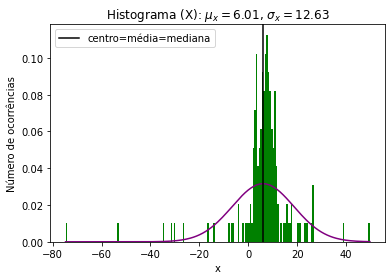

In [ ]:
#Histograma X

_, bins, _ = plt.hist(xlist, bins=200, color="green", density=True)

mux, sigmax = stats.norm.fit(xlist)
best_fit_line = stats.norm.pdf(bins, mux, sigmax)
plt.plot(bins, best_fit_line, color="purple")

plt.title("Histograma (X): $\mu_{x} = $"+"{:.2f}".format(mux)+
          ", $\sigma_{x} = $"+"{:.2f}".format(sigmax))

plt.xlabel("x")
plt.ylabel("Número de ocorrências")

plt.axvline(x=mux, color="black", linestyle="-", label="centro=média=mediana")
plt.legend()
plt.show()

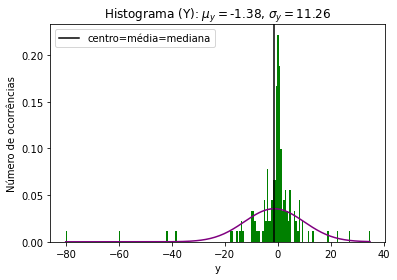

In [ ]:
#Histograma Y
_, bins, _ = plt.hist(ylist, bins=200, color="green", density=True)

muy, sigmay = stats.norm.fit(ylist)
best_fit_line = stats.norm.pdf(bins, muy, sigmay)
plt.plot(bins, best_fit_line, color="purple")

plt.title("Histograma (Y): $\mu_{y} = $"+"{:.2f}".format(muy)+
          ", $\sigma_{y} = $"+"{:.2f}".format(sigmay))

plt.xlabel("y")
plt.ylabel("Número de ocorrências")

plt.axvline(x=muy, color="black", linestyle="-", label="centro=média=mediana")
plt.legend()
plt.show()

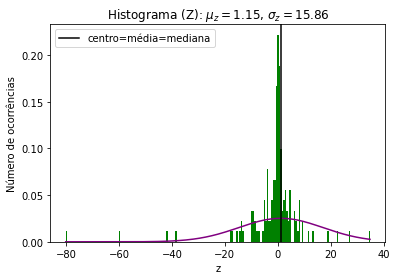

In [ ]:
#Histograma Z
_, bins, _ = plt.hist(ylist, bins=200, color="green", density=True)

muz, sigmaz = stats.norm.fit(zlist)
best_fit_line = stats.norm.pdf(bins, muz, sigmaz)
plt.plot(bins, best_fit_line, color="purple")

plt.title("Histograma (Z): $\mu_{z} = $"+"{:.2f}".format(muz)+
          ", $\sigma_{z} = $"+"{:.2f}".format(sigmaz))

plt.xlabel("z")
plt.ylabel("Número de ocorrências")

plt.axvline(x=muz, color="black", linestyle="-", label="centro=média=mediana")
plt.legend()
plt.show()

In [ ]:
print("R0 = ", math.sqrt(mux**2+muy**2+muz**2))

R0 =  6.276145572369061


* Gráficos X x Y, X x Z, Y x Z

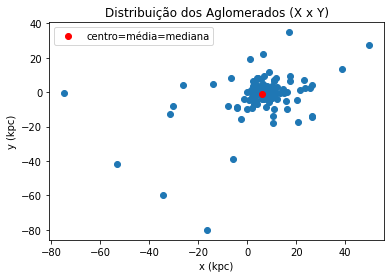

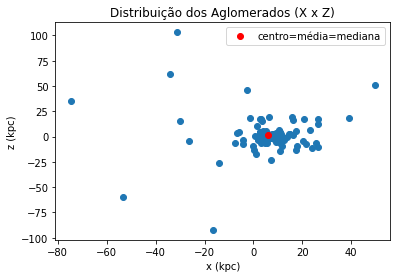

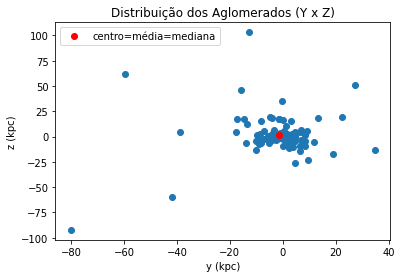

In [ ]:
# X x Y
plt.scatter(xlist, ylist)

plt.title("Distribuição dos Aglomerados (X x Y)")
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")

plt.plot(mux,muy,'ro', label="centro=média=mediana")
plt.legend()
plt.show()

#X x Z
plt.scatter(xlist, zlist)

plt.title("Distribuição dos Aglomerados (X x Z)")
plt.xlabel("x (kpc)")
plt.ylabel("z (kpc)")

plt.plot(mux,muz,'ro', label="centro=média=mediana")
plt.legend()
plt.show()

#Y x Z
plt.scatter(ylist, zlist)

plt.title("Distribuição dos Aglomerados (Y x Z)")
plt.xlabel("y (kpc)")
plt.ylabel("z (kpc)")

plt.plot(muy,muz,'ro', label="centro=média=mediana")
plt.legend()

plt.show()

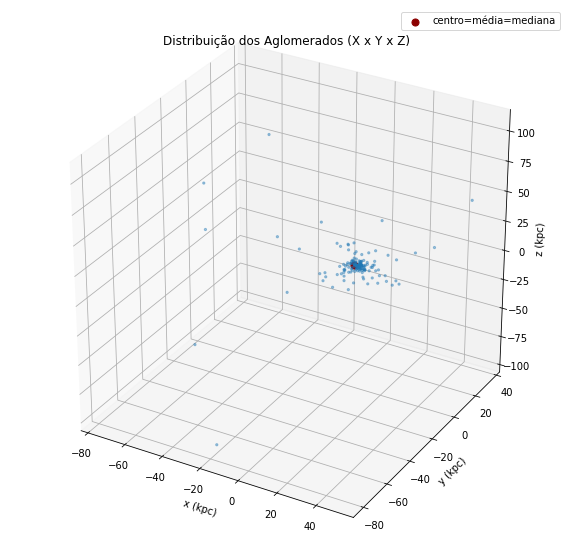

In [ ]:
#Distribuição de Aglomerados 3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")

ax.scatter(xlist, ylist, zlist, s=5, alpha=0.4)
ax.scatter(mux, muy, muz, color="darkred", s=50, alpha=1, label="centro=média=mediana")

ax.set_title("Distribuição dos Aglomerados (X x Y x Z)")
ax.set_xlabel("x (kpc)")
ax.set_ylabel("y (kpc)")
ax.set_zlabel("z (kpc)")

plt.legend()
plt.show()

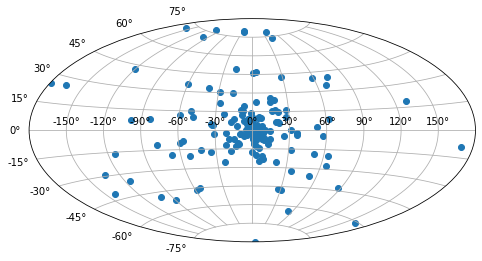

In [ ]:
#Projeção Aitoff
gal = SkyCoord(llist, blist, frame="galactic", unit=u.deg)

plt.figure(figsize=(8, 10))
plt.subplot(111, projection='aitoff')

plt.grid(True)
plt.scatter(gal.l.wrap_at("180d").radian, gal.b.radian)
plt.show()